## Problem statement
The dataset is a book named 'Adventure of Sherlock Holmes'. We have to train a RNN (Recurrent Neural Network) to predict the next word.

Dataset: https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')

## Load data

In [4]:
with open(r'E:\Next Word Prediction Using RNN\LGMVIP-DataScience\LGMVIP-DataScience-Task 2 (Advanced Level)\1661-0 (1).txt','r',encoding='utf-8') as file:
    data = file.read()

In [6]:
# Viewing data
data[0:1000]

"\ufeff\nProject Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.net\n\n\nTitle: The Adventures of Sherlock Holmes\n\nAuthor: Arthur Conan Doyle\n\nRelease Date: November 29, 2002 [EBook #1661]\nLast Updated: May 20, 2019\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***\n\n\n\nProduced by an anonymous Project Gutenberg volunteer and Jose Menendez\n\n\n\ncover\n\n\n\nThe Adventures of Sherlock Holmes\n\n\n\nby Arthur Conan Doyle\n\n\n\nContents\n\n\n   I.     A Scandal in Bohemia\n   II.    The Red-Headed League\n   III.   A Case of Identity\n   IV.    The Boscombe Valley Mystery\n   V.     The Five Orange Pips\n   VI.    The Man wit

## Data Preprocessing

* ### Removing special characters

In [7]:
data = data.replace('\n', ' ').replace('\r',' ').replace('\ufeff',' ')

In [8]:
import re
data = re.sub('[^A-Za-z0-9 ]','',data)

In [9]:
# Viewing changes in data
data[0:1000]

'  Project Gutenbergs The Adventures of Sherlock Holmes by Arthur Conan Doyle  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever  You may copy it give it away or reuse it under the terms of the Project Gutenberg License included with this eBook or online at wwwgutenbergnet   Title The Adventures of Sherlock Holmes  Author Arthur Conan Doyle  Release Date November 29 2002 EBook 1661 Last Updated May 20 2019  Language English  Character set encoding UTF8   START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES     Produced by an anonymous Project Gutenberg volunteer and Jose Menendez    cover    The Adventures of Sherlock Holmes    by Arthur Conan Doyle    Contents      I     A Scandal in Bohemia    II    The RedHeaded League    III   A Case of Identity    IV    The Boscombe Valley Mystery    V     The Five Orange Pips    VI    The Man with the Twisted Lip    VII   The Adventure of the Blue Carbuncle    VIII  The Adventure

* ### Tokenize text

I will consider first 10000 characters from the data for training. 

In [10]:
data_train = data[0:10000]

In [11]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer() 
tokenizer.fit_on_texts([data_train])

In [12]:
sequence_data = tokenizer.texts_to_sequences([data_train])[0]

In [13]:
tokenizer.word_index

{'the': 1,
 'of': 2,
 'and': 3,
 'a': 4,
 'i': 5,
 'to': 6,
 'you': 7,
 'his': 8,
 'it': 9,
 'in': 10,
 'he': 11,
 'was': 12,
 'that': 13,
 'my': 14,
 'is': 15,
 'with': 16,
 'have': 17,
 'which': 18,
 'for': 19,
 'not': 20,
 'from': 21,
 'as': 22,
 'had': 23,
 'do': 24,
 'holmes': 25,
 'at': 26,
 'but': 27,
 'be': 28,
 'by': 29,
 'one': 30,
 'this': 31,
 'all': 32,
 'upon': 33,
 'up': 34,
 'who': 35,
 'me': 36,
 'how': 37,
 'your': 38,
 'are': 39,
 'own': 40,
 'been': 41,
 'or': 42,
 'an': 43,
 'adventure': 44,
 'see': 45,
 'said': 46,
 'sherlock': 47,
 'has': 48,
 'seen': 49,
 'into': 50,
 'there': 51,
 'so': 52,
 'on': 53,
 'know': 54,
 'paper': 55,
 'project': 56,
 'adventures': 57,
 'ebook': 58,
 'no': 59,
 'may': 60,
 'bohemia': 61,
 'case': 62,
 'man': 63,
 'him': 64,
 'eyes': 65,
 'were': 66,
 'himself': 67,
 'yet': 68,
 'little': 69,
 'out': 70,
 'again': 71,
 'then': 72,
 'remarked': 73,
 'very': 74,
 'note': 75,
 'what': 76,
 'arthur': 77,
 'conan': 78,
 'doyle': 79,
 'under

This is our dictionary with each word in the data within the list of unique words as the key, and it’s significant portions as value.

In [14]:
vocab_size = len(tokenizer.word_index) + 1
print('The length of vocabulary of training data is {}.'.format(vocab_size))

The length of vocabulary of training data is 756.


## Define X & Y variables

In building this neural network, I will club 4 characters together. Using first 3 characters of it, I will predict the fourth one. 

In [15]:
# Get 4 words in sequence
sequences = []

for i in range(3,len(sequence_data)): 
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
sequences = np.array(sequences)

print('Number of sequences in data are: ',len(sequences))

Number of sequences in data are:  1853


In [16]:
# View groupings of 4 characters
sequences[0:5]

array([[ 56, 205,   1,  57],
       [205,   1,  57,   2],
       [  1,  57,   2,  47],
       [ 57,   2,  47,  25],
       [  2,  47,  25,  29]])

In [17]:
# Seperate X and Y Values
X = []
Y = []
for i in sequences:
    X.append(i[0:3]) 
    Y.append(i[3])

In [18]:
# Converting X & Y into arrays
X = np.array(X)
Y = np.array(Y)

In [19]:
# View X & Y variables
X[0:5]

array([[ 56, 205,   1],
       [205,   1,  57],
       [  1,  57,   2],
       [ 57,   2,  47],
       [  2,  47,  25]])

In [20]:
Y[0:5]

array([57,  2, 47, 25, 29])

Observe how the groupings of 4 characters above are splitted into X and Y variables.

## Encode Y variable

In [21]:
from keras.utils import to_categorical
Y = to_categorical(Y, num_classes=vocab_size)
# Review changes
Y[0:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Start Building Recurrent Neural Network (RNN)

In [22]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense 
from keras.callbacks import EarlyStopping 

In [23]:
# initialize neural network with Sequential model
nn = Sequential()

# Add Embedding Layer
nn.add(Embedding(vocab_size,10,input_length=3))

# Create LSTM Layers
nn.add(LSTM(1000,return_sequences=True))
nn.add(LSTM(1000))

# Create a Hidden Dense Layer
nn.add(Dense(1000,activation='relu'))

# Output layer
nn.add(Dense(vocab_size,activation='softmax'))

In [24]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             7560      
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 756)               756756    
                                                                 
Total params: 13813316 (52.69 MB)
Trainable params: 13813316 (52.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
early_stop = EarlyStopping(monitor='loss', patience=3)

In [26]:
nn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
hist = nn.fit(X, Y, epochs=50, callbacks=[early_stop])

Epoch 1/50
58/58 [==============================] - 30s 432ms/step - loss: 6.2379 - accuracy: 0.0394
Epoch 2/50
58/58 [==============================] - 23s 398ms/step - loss: 5.8559 - accuracy: 0.0470
Epoch 3/50
58/58 [==============================] - 25s 428ms/step - loss: 5.7581 - accuracy: 0.0529
Epoch 4/50
58/58 [==============================] - 25s 424ms/step - loss: 5.7041 - accuracy: 0.0523
Epoch 5/50
58/58 [==============================] - 27s 464ms/step - loss: 5.6015 - accuracy: 0.0529
Epoch 6/50
58/58 [==============================] - 24s 403ms/step - loss: 5.4049 - accuracy: 0.0561
Epoch 7/50
58/58 [==============================] - 23s 397ms/step - loss: 5.1780 - accuracy: 0.0729
Epoch 8/50
58/58 [==============================] - 23s 393ms/step - loss: 4.8805 - accuracy: 0.0766
Epoch 9/50
58/58 [==============================] - 23s 395ms/step - loss: 4.5597 - accuracy: 0.0869
Epoch 10/50
58/58 [==============================] - 23s 392ms/step - loss: 4.2811 - accura

## Visualize learning curve

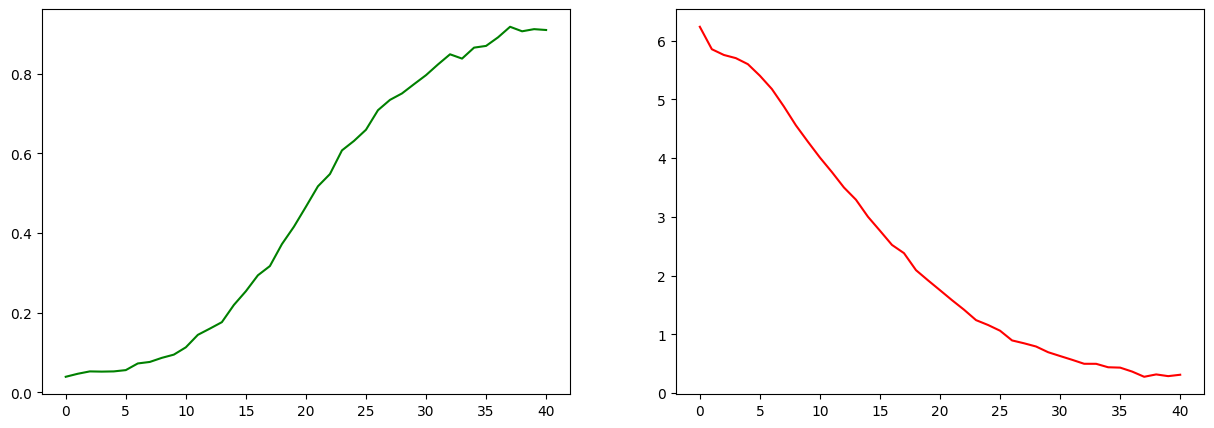

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist.history['accuracy'], color = 'green')
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], color = 'red')
plt.show()

* Accuracy is drastically increasing after 10 epochs.
* Loss is rapidly decreasing upto 30 epochs and them the curve flattens.

## Evaluate model

In [29]:
nn.evaluate(X,Y)

58/58 [==============================] - 5s 54ms/step - loss: 0.2647 - accuracy: 0.9293


[0.2647435665130615, 0.9293038249015808]

### The accuracy of RNN is 93%.

## Define a function for next word prediction

In [30]:
def predict_next_word(model,tokenizer,text):
    seq = tokenizer.texts_to_sequences([text])
    seq = np.array(seq)
    preds = np.argmax(model.predict(seq)) #gives index having max probability
    for key, value in tokenizer.word_index.items(): #finds key value pair from word dictionary
        if value==preds:
            predicted_word = key
            break
    print(predicted_word)
    return predicted_word

In [31]:
predict_next_word(nn,tokenizer,'The adventures of')

1/1 [==============================] - 2s 2s/step
sherlock


'sherlock'

In [32]:
predict_next_word(nn,tokenizer,'an anonymous project')

1/1 [==============================] - 0s 94ms/step
gutenberg


'gutenberg'

### Our RNN is predicting next words correctly.